<a href="https://colab.research.google.com/github/ib0607150085/NBA-Player-Comparison/blob/main/NBAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nba_players = pd.read_csv('nba_stats_with_names_updated.csv')
print(nba_players.head())
print(nba_players.info())
print(nba_players.describe())



      PLAYER_NAME  PLAYER_ID SEASON_ID  LEAGUE_ID     TEAM_ID  \
0  Alaa Abdelnaby      76001   1990-91          0  1610612757   
1  Alaa Abdelnaby      76001   1991-92          0  1610612757   
2  Alaa Abdelnaby      76001   1992-93          0  1610612749   
3  Alaa Abdelnaby      76001   1992-93          0  1610612738   
4  Alaa Abdelnaby      76001   1992-93          0           0   

  TEAM_ABBREVIATION  PLAYER_AGE  GP    GS     MIN  ...  FT_PCT   OREB   DREB  \
0               POR        23.0  43   0.0   290.0  ...   0.568   27.0   62.0   
1               POR        24.0  71   1.0   934.0  ...   0.752   81.0  179.0   
2               MIL        25.0  12   0.0   159.0  ...   0.750   12.0   25.0   
3               BOS        25.0  63  52.0  1152.0  ...   0.760  114.0  186.0   
4               TOT        25.0  75  52.0  1311.0  ...   0.759  126.0  211.0   

     REB  AST   STL   BLK   TOV   PF  PTS  
0   89.0   12   4.0  12.0  22.0   39  135  
1  260.0   30  25.0  16.0  66.0  132  43

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

#Next we preform an exploratoty data analysis
print(nba_players.isnull().sum())
nba_players.dropna(inplace=True)

print("Number of null rows in each column")
print(nba_players.count())

PLAYER_NAME             0
PLAYER_ID               0
SEASON_ID               0
LEAGUE_ID               0
TEAM_ID                 0
TEAM_ABBREVIATION       5
PLAYER_AGE              0
GP                      0
GS                   4579
MIN                   562
FGM                     0
FGA                     0
FG_PCT                 10
FG3M                 4298
FG3A                 4298
FG3_PCT              4455
FTM                     0
FTA                     0
FT_PCT                 77
OREB                 2981
DREB                 2981
REB                   475
AST                     0
STL                  2981
BLK                  2981
TOV                  3792
PF                      0
PTS                     0
dtype: int64
Number of null rows in each column
PLAYER_NAME          17029
PLAYER_ID            17029
SEASON_ID            17029
LEAGUE_ID            17029
TEAM_ID              17029
TEAM_ABBREVIATION    17029
PLAYER_AGE           17029
GP                   17029
GS      

In [ ]:
nba_players.drop_duplicates(inplace=True)
print(nba_players.shape)

(17029, 28)


In [ ]:
nba_players.drop(['PLAYER_NAME'], axis=1, inplace=True)
nba_players.drop(['SEASON_ID'], axis=1, inplace=True)
nba_players.drop(['PLAYER_ID'], axis=1, inplace=True)
nba_players.drop(['TEAM_ID'], axis=1, inplace=True)
nba_players.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)


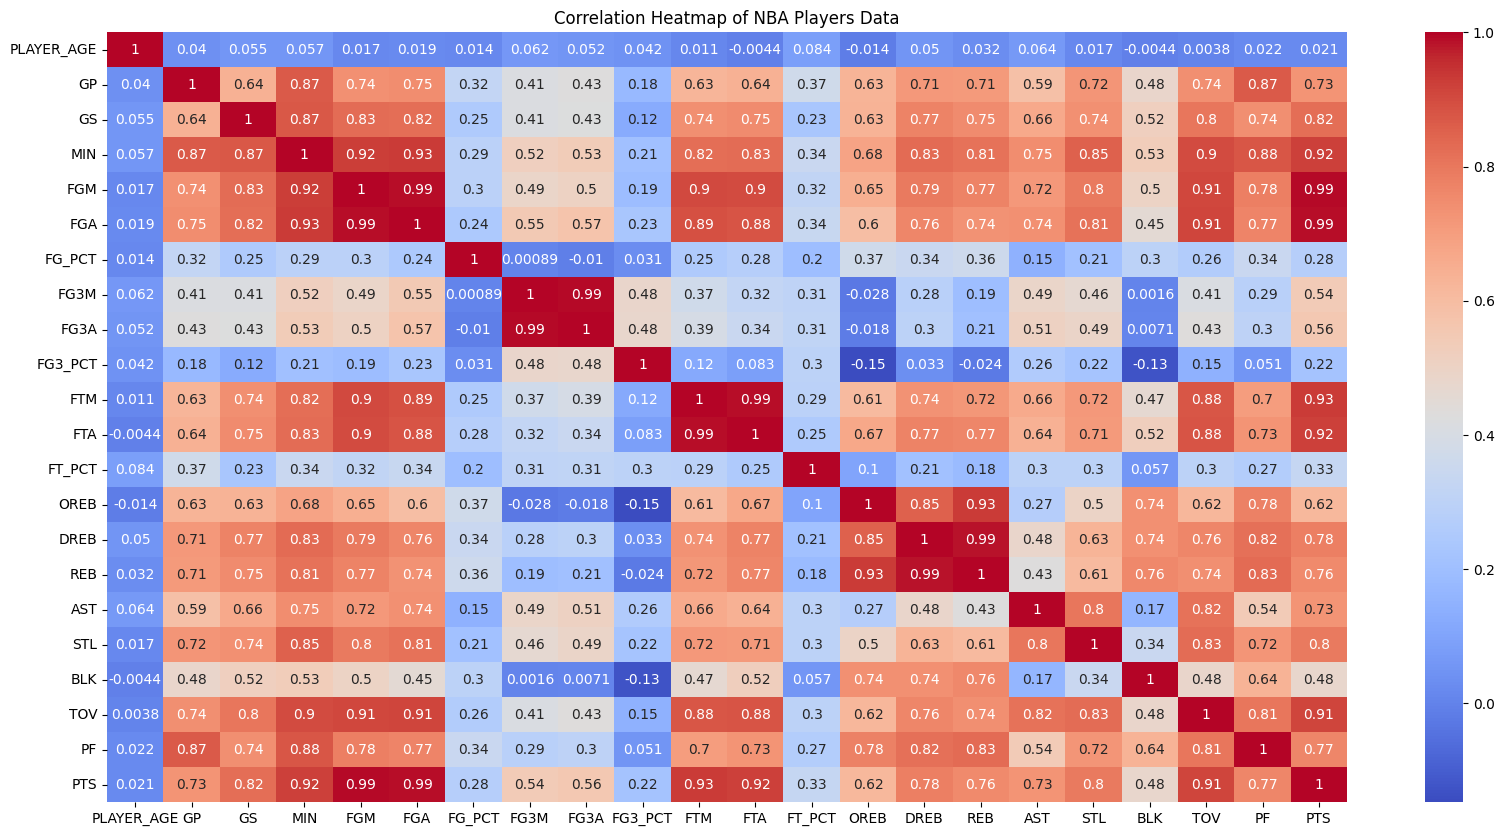

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


nba_players.drop(columns=['LEAGUE_ID'], inplace=True)

# Generate a heatmap of correlation matrix with annotations
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.heatmap(nba_players.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Increase font size of annotations
plt.title('Correlation Heatmap of NBA Players Data')  # Add a title to the plot
plt.show()


In [ ]:
#printing the biggest correlations between each variable
corr_matrix = nba_players.corr()
print(corr_matrix['PTS'].sort_values(ascending=False))
print(corr_matrix['AST'].sort_values(ascending=False))
print(corr_matrix['REB'].sort_values(ascending=False))
print(corr_matrix['STL'].sort_values(ascending=False))
print(corr_matrix['BLK'].sort_values(ascending=False))
print(corr_matrix['TOV'].sort_values(ascending=False))
print(corr_matrix['PF'].sort_values(ascending=False))


def corr_matrix(df):
    corr = df.corr()
    for col in corr.columns:
        for row in corr.index:
          if(corr.loc[row,col]> 0.75):
            print(f"{col} and {row} have a correlation of {corr.loc[row, col]}")
    plt.show()

corr_matrix(nba_players)

def correlation_dict(df):
  corr = df.corr()
  corr_dict = {}

  # Iterate through each column
  for col in corr.columns:
      # Iterate through each row
      for row in corr.index:
          # Exclude cases where the correlation is with itself (correlation coefficient of 1)
          if col == row:
              continue
          # Check if the correlation coefficient is greater than 0.75
          if abs(corr.loc[row, col]) > 0.75:  # Use abs() to handle negative correlations
              corr_dict[(col, row)] = corr.loc[row, col]

  return corr_dict
  '''
    corr = df.corr()
    corr_dict = {}
    for col in corr.columns:
        for row in corr.index:
          if col == row:
                continue
          if abs(corr.loc[row, col]) > 0.75:  # Use abs() to handle negative correlations
                corr_dict[(col, row)] = corr.loc[row, col]

    return corr_dict
    '''

corr_dict = correlation_dict(nba_players)
print(corr_dict)

PTS           1.000000
FGM           0.993460
FGA           0.989642
FTM           0.930723
FTA           0.923006
MIN           0.922667
TOV           0.912483
GS            0.822686
STL           0.797570
DREB          0.784010
PF            0.766009
REB           0.755825
GP            0.730212
AST           0.728722
OREB          0.615746
FG3A          0.556166
FG3M          0.539093
BLK           0.478176
FT_PCT        0.329522
FG_PCT        0.277302
FG3_PCT       0.216068
PLAYER_AGE    0.021246
Name: PTS, dtype: float64
AST           1.000000
TOV           0.815633
STL           0.804582
MIN           0.746989
FGA           0.739104
PTS           0.728722
FGM           0.716951
GS            0.664596
FTM           0.662567
FTA           0.638001
GP            0.586670
PF            0.539802
FG3A          0.510534
FG3M          0.485831
DREB          0.481079
REB           0.429405
FT_PCT        0.298994
OREB          0.270475
FG3_PCT       0.257535
BLK           0.165037
FG_PCT  

In [ ]:
def selection_sort(dictionary):
    items = list(dictionary.items())
    n = len(items)

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if items[j][1] > items[min_idx][1]:  # Compare values at index 1 (the values)
                min_idx = j

        items[i], items[min_idx] = items[min_idx], items[i]

    sorted_dict = dict(items)  # Convert back to dictionary after sorting
    return sorted_dict

def delete_duplicate_regressions(dictionary):
    unique_pairs = set()
    new_dict = {}

    for (key1, key2), value in dictionary.items():
        # Create a sorted tuple to normalize the pair
        sorted_pair = tuple(sorted((key1, key2)))

        if sorted_pair not in unique_pairs:
            unique_pairs.add(sorted_pair)
            new_dict[(key1, key2)] = value

    return new_dict



# Sort the dictionary by values
sorted_dict = selection_sort(corr_dict)

# Create a new dictionary with values above 0.85
new_corr_dict = {key: value for key, value in sorted_dict.items() if value >= 0.85}

# Remove duplicate regressions
new_corr_dict = delete_duplicate_regressions(new_corr_dict)

# Print the final dictionary without duplicates
print(new_corr_dict)
print("\n",len(new_corr_dict))


{('FGM', 'PTS'): 0.9934597112532224, ('FG3M', 'FG3A'): 0.9918153612369092, ('FGM', 'FGA'): 0.9899576125272619, ('FGA', 'PTS'): 0.9896419039409046, ('FTM', 'FTA'): 0.9886957033504623, ('DREB', 'REB'): 0.9860230856624356, ('MIN', 'FGA'): 0.9314869994960374, ('FTM', 'PTS'): 0.9307228693242788, ('OREB', 'REB'): 0.9287445264587618, ('FGM', 'MIN'): 0.9249319783963871, ('FTA', 'PTS'): 0.9230055039085748, ('MIN', 'PTS'): 0.9226672863155161, ('TOV', 'PTS'): 0.9124829253157744, ('FGA', 'TOV'): 0.9104587324018306, ('FGM', 'TOV'): 0.9089916057188837, ('FTM', 'FGM'): 0.9016063015759149, ('FTA', 'FGM'): 0.900621171557647, ('MIN', 'TOV'): 0.900565943413796, ('FTM', 'FGA'): 0.8913657136734184, ('FGA', 'FTA'): 0.8831795163572935, ('FTA', 'TOV'): 0.8826163590483724, ('MIN', 'PF'): 0.8786801411194476, ('FTM', 'TOV'): 0.8761580245687853, ('MIN', 'GS'): 0.8721024287603102, ('MIN', 'GP'): 0.8677216728710528, ('PF', 'GP'): 0.8670986755987651, ('OREB', 'DREB'): 0.8539982848175817, ('MIN', 'STL'): 0.8529837126

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ensure all numerical values are cast to floats
nba_players = nba_players.astype(float)

def filter_features(df, corr_dict, threshold=0.85):
    filtered_features = []
    for keys, value in corr_dict.items():
        if value >= threshold:
            for key in keys:
                if key not in filtered_features:
                    filtered_features.append(key)
    return df[filtered_features]

def preprocess_data(df, keys):
    if isinstance(keys, tuple):
        X = df[list(keys)]
        y = df[keys[0]]  # Use the first key as y
    else:
        X = df.drop(keys, axis=1)
        y = df[keys]
    return X, y

# Apply feature filtering
nba_players_filtered = filter_features(nba_players, new_corr_dict)

for keys, value in new_corr_dict.items():
    try:
        X, y = preprocess_data(nba_players_filtered, keys)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Apply PCA to reduce dimensionality
        pca = PCA(n_components=0.95)  # Retain 95% of variance
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        # Train the model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {keys}: {accuracy}")
        print(f"Feature importances: {model.feature_importances_}")

    except KeyError as e:
        print(e)


NameError: name 'nba_players' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, bernoulli

def ssvs_binary(data, y, x, inprob, runs, burn, progress):
    # Automatically convert any two-level factors to binary variables
    for col in x:
        if len(data[col].unique()) == 2:
            data[col] = pd.factorize(data[col])[0]
            print(f"Two-level factor {col} converted to binary")

    x_data = data[x]
    y_data = data[y]

    # Scale inputs
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_data)
    y_matrix = y_data.values.reshape(-1, 1)

    # Make a column of 1s for the design matrix
    intercept = np.ones((x_scaled.shape[0], 1))

    # Create design matrix that includes the column of 1s and the predictors
    design_matrix = np.hstack((intercept, x_scaled))

    # Prior settings
    K = design_matrix.shape[1]
    prior_var = np.diag([1] + [1 / (K * inprob)] * (K - 1))

    # Storage for MCMC samples
    beta_samples = np.zeros((runs, K))

    # Initial beta
    beta = np.zeros(K)

    for run in range(runs):
        # Gibbs sampling step for beta
        for j in range(K):
            X_j = design_matrix[:, j].reshape(-1, 1)
            other_X = np.delete(design_matrix, j, axis=1)
            other_beta = np.delete(beta, j)

            # Calculate the conditional distribution parameters
            mu_j = X_j.T @ (y_matrix - other_X @ other_beta)
            sigma_j = np.sqrt(np.linalg.inv(X_j.T @ X_j + prior_var[j, j]))

            # Ensure mu_j and sigma_j are scalars
            mu_j = mu_j.item()  # Extract the scalar value from the array
            sigma_j = sigma_j.item()  # Extract the scalar value from the array

            # Sample from the conditional distribution
            beta[j] = norm.rvs(mu_j, sigma_j)

        beta_samples[run, :] = beta

        # Optional progress display
        if progress and run % (runs // 10) == 0:
            print(f"Progress: {run / runs:.0%}")

    # Burn-in period
    beta_samples = beta_samples[burn:, :]

    # Average the beta coefficients across iterations
    beta_means = np.mean(beta_samples, axis=0)

    # Store the results in a DataFrame
    beta_df = pd.DataFrame(beta_means[1:], index=x_data.columns, columns=['beta'])

    return beta_df
# Example usage (Note: Replace 'data' with your actual DataFrame and 'y' and 'x' with your actual column names)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

def ssvs_binary(data, y_col, inprob, runs, burn, progress):
    # Automatically convert any two-level factors to binary variables
    for col in data.columns:
        if len(data[col].unique()) == 2:
            data[col] = pd.factorize(data[col])[0]
            print(f"Two-level factor '{col}' converted to binary")

    # Extract y_data
    y_data = data[y_col]

    # Scale inputs
    scaler = StandardScaler()
    x_data = data.drop(columns=[y_col])  # Drop y_col from x_data
    x_scaled = scaler.fit_transform(x_data)
    y_matrix = y_data.values.reshape(-1, 1)

    # Make a column of 1s for the design matrix
    intercept = np.ones((x_scaled.shape[0], 1))

    # Create design matrix that includes the column of 1s and the predictors
    design_matrix = np.hstack((intercept, x_scaled))

    # Prior settings
    K = design_matrix.shape[1]
    prior_var = np.diag([1] + [1 / (K * inprob)] * (K - 1))

    # Storage for MCMC samples
    beta_samples = np.zeros((runs, K))

    # Initial beta
    beta = np.zeros(K)

    for run in range(runs):
        # Gibbs sampling step for beta
        for j in range(K):
            X_j = design_matrix[:, j].reshape(-1, 1)
            other_X = np.delete(design_matrix, j, axis=1)
            other_beta = np.delete(beta, j)

            # Calculate the conditional distribution parameters
            mu_j = X_j.T @ (y_matrix - other_X @ other_beta)
            sigma_j = np.sqrt(np.linalg.inv(X_j.T @ X_j + prior_var[j, j]))

            # Sample from the conditional distribution
            beta[j] = norm.rvs(mu_j, sigma_j)

        beta_samples[run, :] = beta

        # Optional progress display
        if progress and run % (runs // 10) == 0:
            print(f"Progress: {run / runs:.0%}")

    # Burn-in period
    beta_samples = beta_samples[burn:, :]

    # Average the beta coefficients across iterations
    beta_means = np.mean(beta_samples, axis=0)

    # Store the results in a DataFrame
    beta_df = pd.DataFrame(beta_means[1:], index=x_data.columns, columns=['beta'])

    return beta_df

# Example usage:
# Assuming data is your DataFrame with 'PTS' as the target variable
result = ssvs_binary(nba_players, 'PTS', inprob=0.2, runs=1000, burn=100, progress=True)

# Print the result
print(result)

ValueError: setting an array element with a sequence.